# **Movie Rating Prediction**

### Problem Objective :

-Build a model that predicts the rating of a movie based on features like genre, director, and actors.

-The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

<img src="https://media.giphy.com/media/u7uiWWbRFC2TC/giphy.gif">


### Let's Get Started >>>

## Data Acquisition

In [1]:
import pandas as pd

#Input movies dataset
movies = pd.read_csv(r"C:\Users\Subhajit Nath\Documents\DataSets\Movie Rating Prediction\movies.dat", sep='::', engine='python', encoding='latin1')
movies.columns =['MovieID', 'Title', 'Genres']
movies.dropna(inplace=True)
movies.head()

MovieID                               Title                        Genres
0        2                      Jumanji (1995)  Adventure|Children's|Fantasy
1        3             Grumpier Old Men (1995)                Comedy|Romance
2        4            Waiting to Exhale (1995)                  Comedy|Drama
3        5  Father of the Bride Part II (1995)                        Comedy
4        6                         Heat (1995)         Action|Crime|Thriller

In [2]:
#Input ratings dataset
ratings = pd.read_csv(r"C:\Users\Subhajit Nath\Documents\DataSets\Movie Rating Prediction\ratings.dat",sep='::', engine='python')
ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.dropna(inplace=True)

#Read the sample ratings dataset
ratings.head()

UserID  MovieID  Rating  Timestamp
0       1      661       3  978302109
1       1      914       3  978301968
2       1     3408       4  978300275
3       1     2355       5  978824291
4       1     1197       3  978302268

In [3]:
#Input users dataset
users = pd.read_csv(r"C:\Users\Subhajit Nath\Documents\DataSets\Movie Rating Prediction\users.dat",sep='::',engine='python')
users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.dropna(inplace=True)

#Read the sample users dataset
users.head()

UserID Gender  Age  Occupation Zip-code
0       2      M   56          16    70072
1       3      M   25          15    55117
2       4      M   45           7    02460
3       5      M   25          20    55455
4       6      F   50           9    55117

In [4]:
#Merge the ratings and users with movieID and UserID
ratings_user = pd.merge(ratings,users, on=['UserID'])
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

master_data = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]

master_data.head()

MovieID                                     Title  UserID  Age Gender  \
0     1357                              Shine (1996)       2   56      M   
1     3068                       Verdict, The (1982)       2   56      M   
2     1537  Shall We Dance? (Shall We Dansu?) (1996)       2   56      M   
3      647                 Courage Under Fire (1996)       2   56      M   
4     2194                  Untouchables, The (1987)       2   56      M   

   Occupation  Rating  
0          16       5  
1          16       4  
2          16       4  
3          16       3  
4          16       4

## Data Visualization

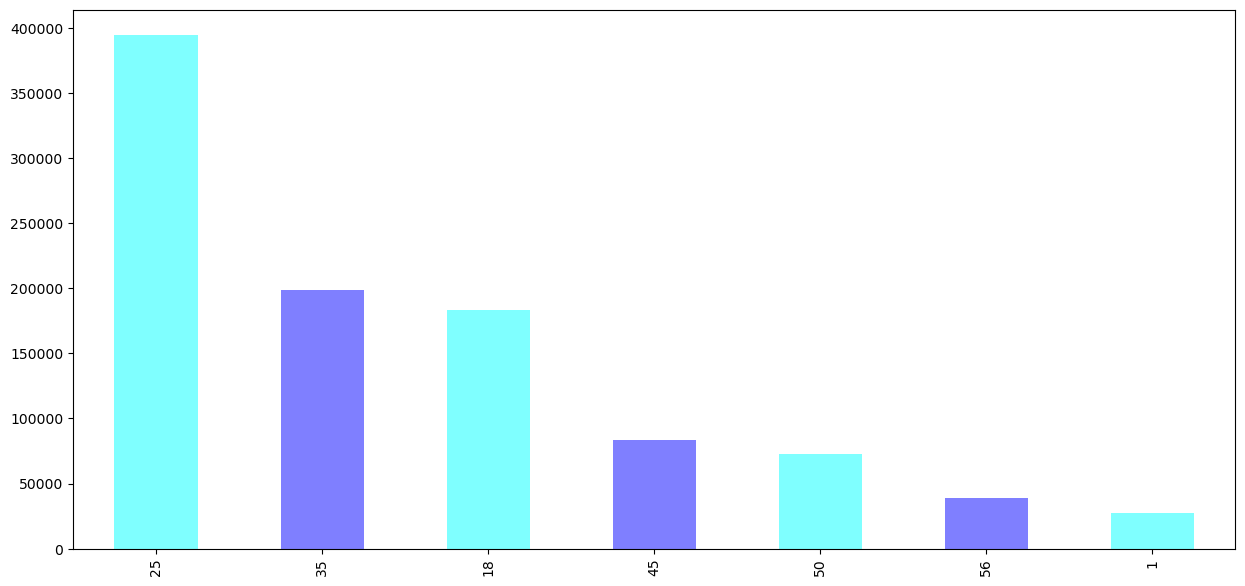

In [40]:
import matplotlib.pyplot as plt
master_data['Age'].value_counts().plot(kind='bar', color= ['cyan', 'blue'],alpha=0.5,figsize=(15,7))
plt.show()

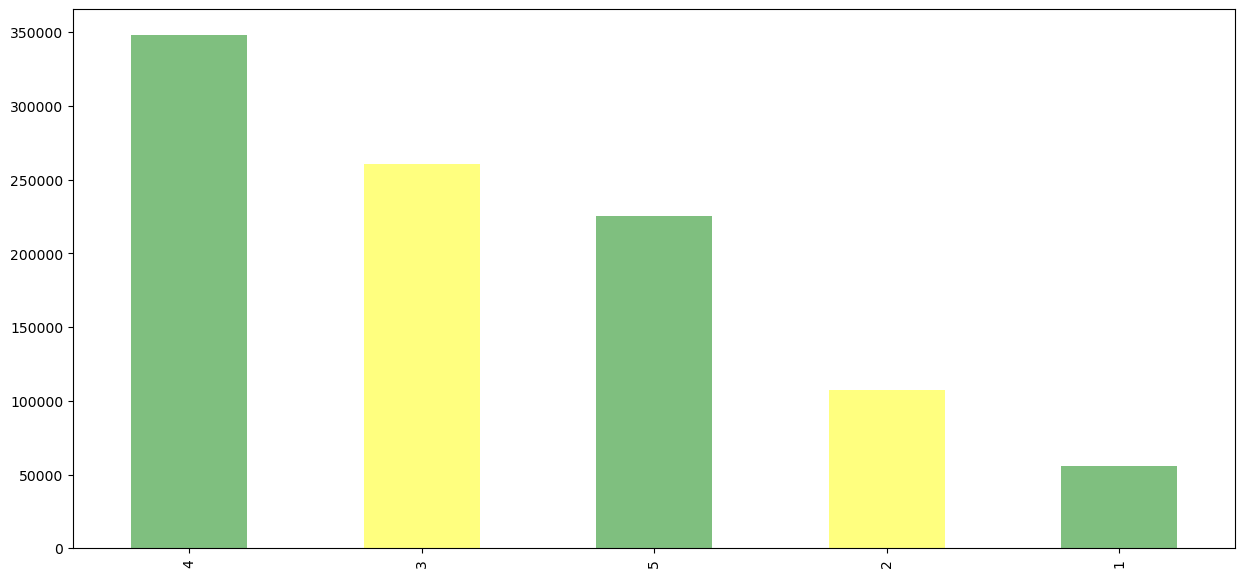

In [41]:
master_data['Rating'].value_counts().plot(kind='bar', color=['green', 'yellow'],alpha=0.5,figsize=(15,7))
plt.show()

Age
18    34
25    72
35    29
45    12
50     4
56     7
Name: MovieID, dtype: int64

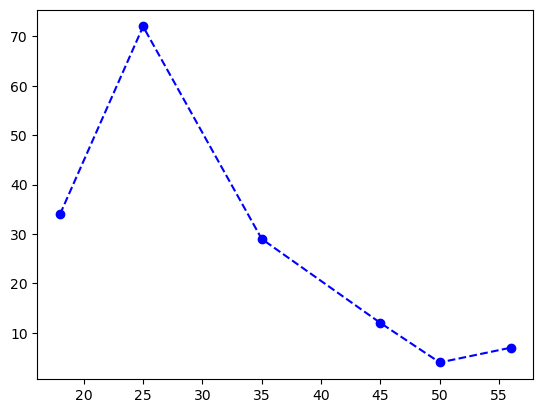

In [12]:
#User rating of the movie “Toy Story”

res = master_data[master_data.Title == "Only You (1994)"]

plt.plot(res.groupby("Age")["MovieID"].count(),'--bo')
res.groupby("Age")["MovieID"].count()

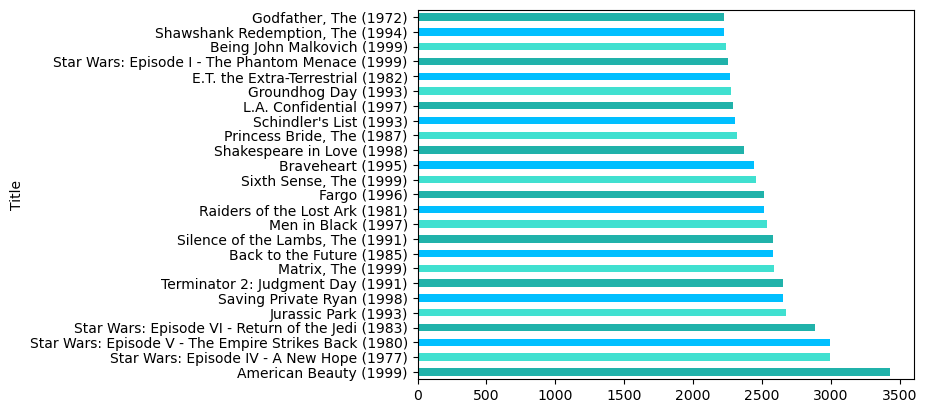

In [52]:
#Top 25 movies by viewership rating

res = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh", color = ['lightseagreen', 'turquoise', 'deepskyblue'])
plt.show()

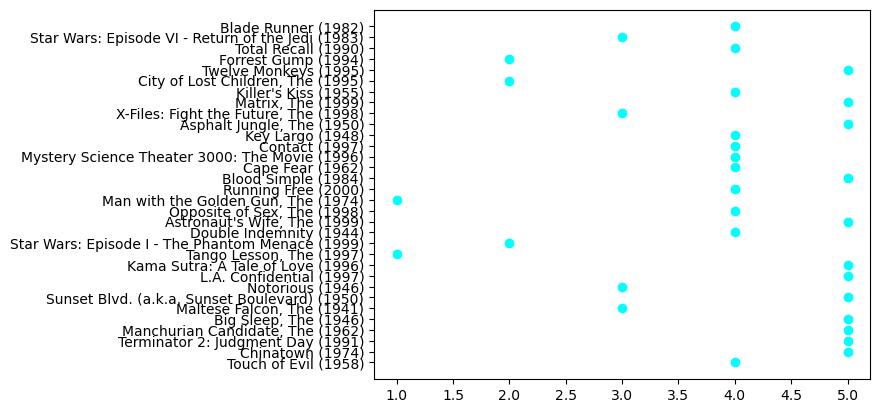

In [54]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 700

res = master_data[master_data.UserID == 700]

plt.scatter(y=res.Title, x=res.Rating , color = 'aqua')
plt.show()

<Axes: xlabel='Rating', ylabel='Rating'>

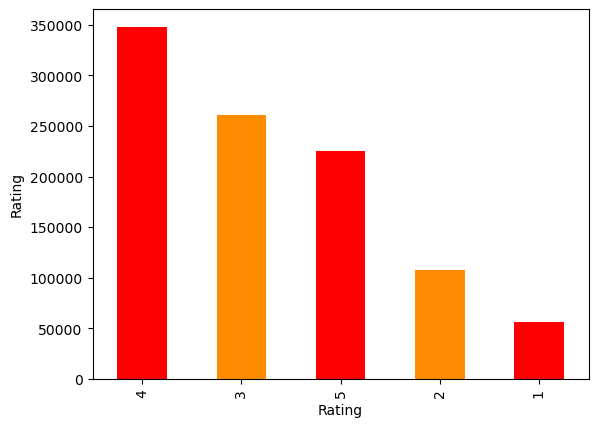

In [44]:
import seaborn as sns
res = master_data.groupby("Rating").size().sort_values(ascending=False)[:25]
plt.ylabel("Rating")
plt.xlabel("Viewership Count")
res.plot(kind='bar', color= ['red', 'darkorange'])

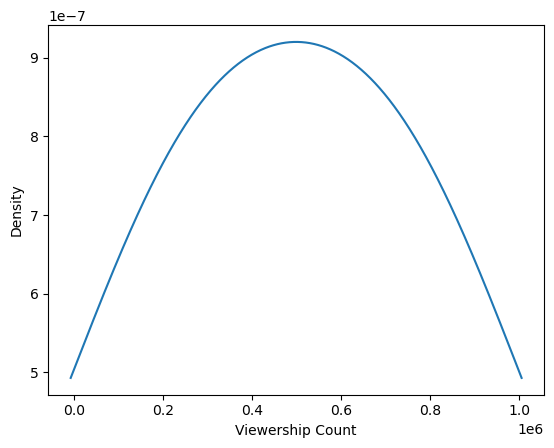

In [25]:
import seaborn as sns
res = master_data.groupby("Gender").size().sort_values(ascending=False)[:25]
plt.ylabel("Gender")
plt.xlabel("Viewership Count")
res.plot(kind="kde")
plt.show()

## Machine Learning

<img src ="https://media.giphy.com/media/4TtTVTmBoXp8txRU0C/giphy.gif">

In [55]:
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
import warnings
warnings.filterwarnings('ignore')

#First 500 extracted records
first_500 = master_data[500:]
first_500.dropna(inplace=True)

In [57]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

#Use rating as label
labels = first_500[['Rating']].values

In [58]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

## Machine Learning Models

### Logistic Regression

In [16]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

34.86

### K Nearest Neighbors Classifier

In [17]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

44.86

### Gaussian Naive Bayes

In [18]:
gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

34.88

### Perceptron

In [61]:
perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

33.05

### Decision Tree

In [59]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

56.54